# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

## Make Classification: Car Brand Logos

### EMILIANO MENDOZA NIETO - A01706083

In [2]:
# Librerias usadas
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [3]:
# Rutas de los directorios de entrenamiento y validación
train_path = 'Car_Brand_Logos\\Train'
validation_path = 'Car_Brand_Logos\\Test'


In [4]:
# Dimensiones de la imagen y número de clases
img_width, img_height = 224, 224  # Dimensiones esperadas por VGG16
num_classes = 8  # Cambiar según el número de marcas de coches en el dataset
"""             1.- Hyundai
                2.- Lexus
                3.- Mazda
                4.- Mercedes
                5.- Opel
                6.- Skoda
                7.- Toyota
                8.- Volkswagen"""
                

'             1.- Hyundai\n                2.- Lexus\n                3.- Mazda\n                4.- Mercedes\n                5.- Opel\n                6.- Skoda\n                7.- Toyota\n                8.- Volkswagen'

In [5]:
# Generador de datos con aumento de datos para el entrenamiento
train_data_aum = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
# Solo necesitamos rescale para la validación, sin aumento de datos
validation_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
# Flujos de datos de entrenamiento y validación
train_generator = train_data_aum.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [8]:
# Cargamos la base de VGG16 sin incluir las capas superiores y con pesos preentrenados en ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [9]:
# Congelamos las capas de la base_model
for layer in base_model.layers:
    layer.trainable = False
    

In [10]:
# Capas personalizadas en la parte superior de la base_model
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)


In [12]:
# Modelo final
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
epochs=10

In [13]:
# Entrenamos el modelo
entrenamiento = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
78/78 [==============================] - 173s 2s/step - loss: 1.7839 - accuracy: 0.3728 - val_loss: 1.2054 - val_accuracy: 0.6484
Epoch 2/10
78/78 [==============================] - 176s 2s/step - loss: 1.2075 - accuracy: 0.6090 - val_loss: 0.9345 - val_accuracy: 0.7370
Epoch 3/10
78/78 [==============================] - 173s 2s/step - loss: 1.0752 - accuracy: 0.6497 - val_loss: 0.8418 - val_accuracy: 0.7604
Epoch 4/10
78/78 [==============================] - 173s 2s/step - loss: 0.9464 - accuracy: 0.6896 - val_loss: 0.8219 - val_accuracy: 0.7344
Epoch 5/10
78/78 [==============================] - 173s 2s/step - loss: 0.8730 - accuracy: 0.7263 - val_loss: 0.7596 - val_accuracy: 0.7734
Epoch 6/10
78/78 [==============================] - 173s 2s/step - loss: 0.8275 - accuracy: 0.7320 - val_loss: 0.7908 - val_accuracy: 0.7552
Epoch 7/10
78/78 [==============================] - 176s 2s/step - loss: 0.7832 - accuracy: 0.7437 - val_loss: 0.7482 - val_accuracy: 0.7734
Epoch 8/10
78

In [14]:
# Guardar el modelo
guardado = model.save('car_brand_classifier20.h5')

# Reanudar el entrenamiento mas adelante
#modelo = tf.keras.models.load_model('car_brand_classifier10.h5')
"""entrenamiento = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)"""

C:\Users\emime\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'entrenamiento = model.fit(\n    train_generator,\n    steps_per_epoch=train_generator.samples // train_generator.batch_size,\n    epochs=10,\n    validation_data=validation_generator,\n    validation_steps=validation_generator.samples // validation_generator.batch_size\n)'

In [17]:
# Plot de la precisión y la pérdida en entrenamiento y test
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(accuracy) + 1)

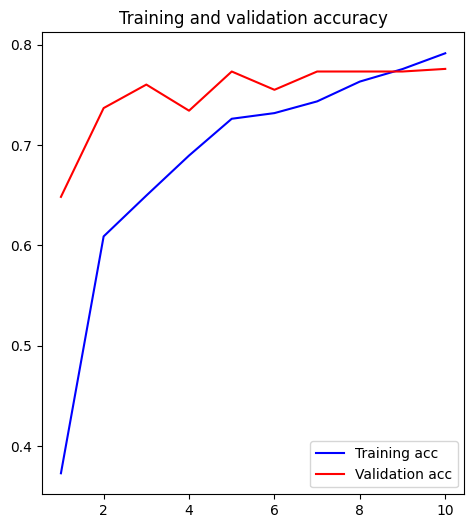

In [18]:
# Precisión en entrenamiento y test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

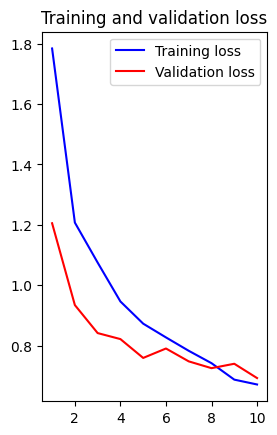

In [19]:
# Pérdida en entrenamiento y test
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# Descongelamos las últimas bloques convolucionales de VGG16
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [21]:
# Re-compilamos el modelo para que los cambios tengan efecto
model.compile(optimizer=Adam(learning_rate=0.00001),  # Learning rate más bajo para el ajuste fino
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# Continuamos el entrenamiento
entrenamiento_fino = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
78/78 [==============================] - 268s 3s/step - loss: 0.5628 - accuracy: 0.8206 - val_loss: 0.6637 - val_accuracy: 0.8151
Epoch 2/5
78/78 [==============================] - 264s 3s/step - loss: 0.4327 - accuracy: 0.8634 - val_loss: 0.5890 - val_accuracy: 0.8229
Epoch 3/5
78/78 [==============================] - 256s 3s/step - loss: 0.3853 - accuracy: 0.8763 - val_loss: 0.5978 - val_accuracy: 0.8333
Epoch 4/5
78/78 [==============================] - 202s 3s/step - loss: 0.3401 - accuracy: 0.8936 - val_loss: 0.5913 - val_accuracy: 0.8385
Epoch 5/5
78/78 [==============================] - 210s 3s/step - loss: 0.3233 - accuracy: 0.8976 - val_loss: 0.5593 - val_accuracy: 0.8411


In [23]:
# Guardar el modelo
guardado_fino = model.save('car_brand_classifier21.h5')

# Reanudar el entrenamiento mas adelante
#modelo = tf.keras.models.load_model('car_brand_classifier10.h5')
"""entrenamiento_fino = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Número de epochs para el ajuste fino
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)"""

'entrenamiento_fino = model.fit(\n    train_generator,\n    steps_per_epoch=train_generator.samples // train_generator.batch_size,\n    epochs=5,  # Número de epochs para el ajuste fino\n    validation_data=validation_generator,\n    validation_steps=validation_generator.samples // validation_generator.batch_size\n)'

In [24]:
# Plot de la precisión y la pérdida en validación
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(accuracy) + 1)

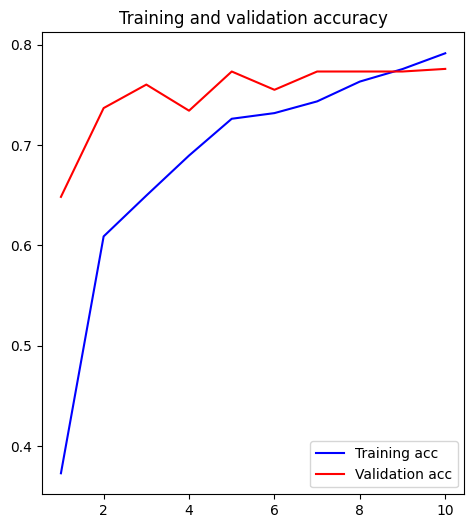

In [25]:
# Precisión en validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

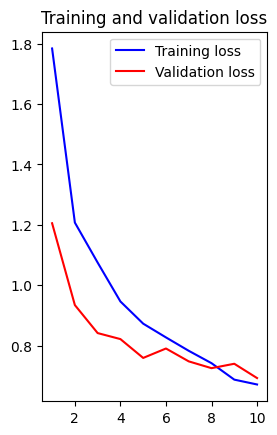

In [26]:
# Pérdida en validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
# PREDICIONES DE IMAGENES NUEVAS
def predict_car_brand(image_path, model):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)
    
    labels = {v: k for k, v in train_generator.class_indices.items()}
    car_brand = labels[class_idx[0]]
    return car_brand

# Ejemplo de uso:
image_path = 'Car_Brand_Logos\\new_images\\toyotagoogle.jpeg'
print(predict_car_brand(image_path, model))


1/1 [==============================] - 0s 119ms/step
toyota


C:\Users\emime\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
